<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666/blob/main/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Computer Practical 2** 

OK, now we are going to step it up a little and bring in some slighltly more complex tools. These will help you analyse the data and make some more indepth intepretations. The aims of this practical will be to:

1. Introduce Correlations
2. Fourier Correlations 
3. Introduce Principle Components Analysis
4. In introduce the basics of LMS and regression.  


# Correlations
We will start with *correlations*. So first...what is a correlaton...let's take a look at a simple signal and I can show you...

In [17]:
import numpy as np
import matplotlib.pyplot as plt 

sine_wave = np.sin(np.arange(0,20*np.pi,np.pi/100));
cosine_wave = np.cos(np.arange(0,20*np.pi,np.pi/100));

Here we have created a sine wave and a cosine wave. What we can do now is to find how the correlate with one another. We know that a period of a sine wave is 2π so as we have told the computer to create 10 cycles. Let's plot them to see what they look like:

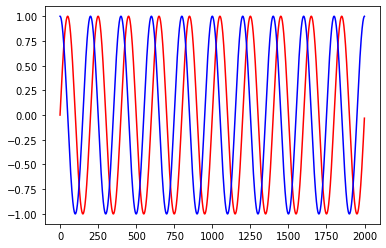

In [18]:
plt.plot(sine_wave,'r')
plt.plot(cosine_wave,'b')

Here we can see that they two waves are separated by π we know this as that is what the defintion of sine and cosine. In our case here we have made π = 100 steps. So the correlation should tell us this:

In [25]:
corr = np.correlate(sine_wave-mean,cosine_wave,'full')

So now we could plot corr...and this might look a little strange...there is a complex mathematical reasoning behind this...but honestly...I don't want to go into it...well I might in the lecture!

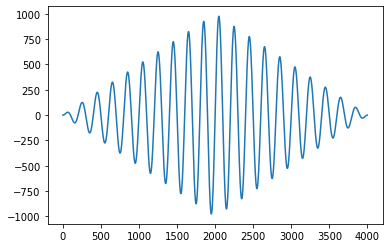

In [26]:
plt.plot(corr)

We can see this nor creates a symmetrical version of correlation...looks pretty right!!! However, it now makes sense to clip this in two! 

In [43]:
length_of_signal = np.size(corr,0)
print(length_of_signal)
half_of_signal = (1+length_of_signal)/2
print(half_of_signal)

3999
2000.0


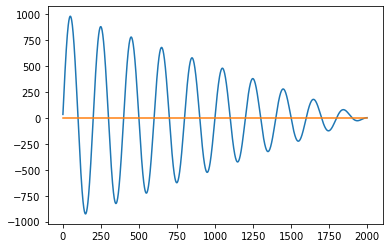

In [52]:
plt.plot(corr[int(half_of_signal)::])
plt.plot([0,2000],[0,0])

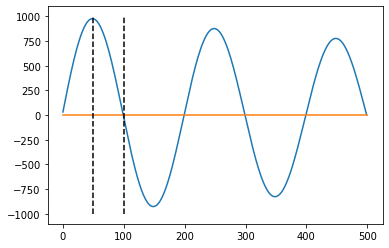

In [66]:
plt.plot(corr[int(half_of_signal):int(half_of_signal)+500])
plt.plot([0,500],[0,0])
plt.plot([50,50],[-1000,1000],'k--')
plt.plot([100,100],[-1000,1000],'k--')

Quite clearly we can no see there from the first peak to he point in which the curve crosses the x-axis is they lag between the signals i.e. (50) the point at which the become the same. We can now prove this:


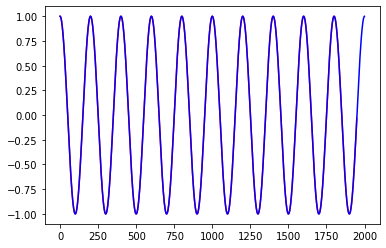

In [67]:
plt.plot(sine_wave[50::],'r')
plt.plot(cosine_wave,'b')

# Fourier Power Spectra

OK, next we are going to look at something called a Fourier Power Spectra. What is this?! Well Fourier description told use that any single can be described by a set of superimposed sine waves:

 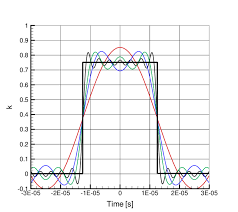

This means we should be able to determine any repetable patterns out out any signal...OK so lets look a this:

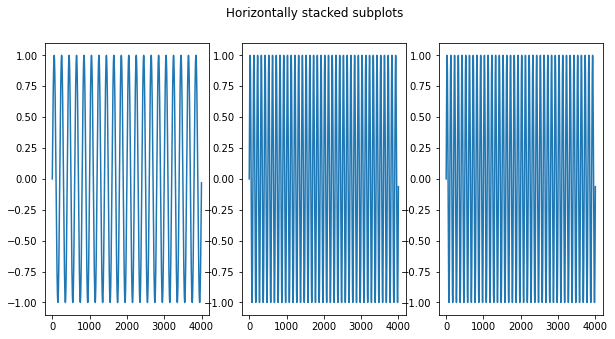

In [110]:
#creating a fake signal 

sine_wave_1 = np.sin(np.arange(0,40*np.pi,np.pi/100));
sine_wave_2 = np.sin(np.arange(0,80*np.pi,np.pi/50));
sine_wave_3 = np.sin(np.arange(0,160*np.pi,np.pi/25));
comb = sine_wave_1+sine_wave_2+sine_wave_3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 5)) # here we define we can have a 2 colums and 1 rows plots

fig.suptitle('Horizontally stacked subplots')
ax1.plot(sine_wave_1)
ax2.plot(sine_wave_2)
ax3.plot(sine_wave_2)


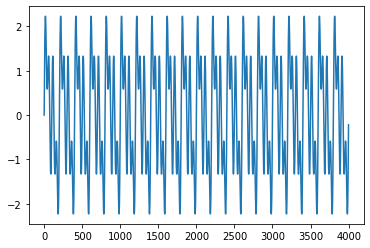

In [111]:
# Just plotting the combination of the sine waves
plt.plot(comb)

So we can now see how we can get the orignal signals out from ths signal. We can does ths with a pwelch fourier transform. There is a full paper about what this does...written by P Welch...but I wouldn't worry too much about it! 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 4096 is greater than input length  = 4000, using nperseg = 4000
  .format(nperseg, input_length))


(0.0, 7.0)

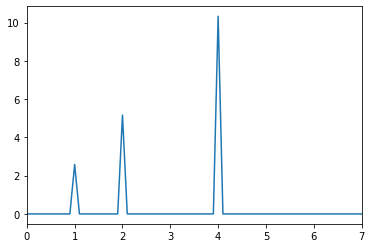

In [117]:
from scipy import signal

x = comb
fs = 200 #our frequency x 2 (Nyquist-Shannon theory)

fxx, pxx = signal.welch(x,fs,nperseg=4096)

# we now sqrt as this is a measure of variance i.e. something squared! 
plt.plot(fxx,np.sqrt(pxx))
plt.xlim([0,7])

Here we can now see it is possible to determine the inner frequencies. Maybe we can even do something to determine how strong the signal is. 

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 4096 is greater than input length  = 4000, using nperseg = 4000
  .format(nperseg, input_length))


(0.0, 7.0)

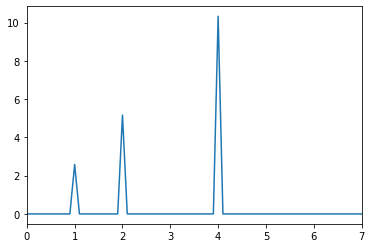

In [116]:
#creating a fake signal 
sine_wave_1 = np.sin(np.arange(0,40*np.pi,np.pi/100));
sine_wave_2 = 2*np.sin(np.arange(0,80*np.pi,np.pi/50));
sine_wave_3 = 4*np.sin(np.arange(0,160*np.pi,np.pi/25));
comb = sine_wave_1+sine_wave_2+sine_wave_3
x = comb
fs = 200 #our frequency x 2 (Nyquist-Shannon theory)
fxx, pxx = signal.welch(x,fs,nperseg=4096)
plt.plot(fxx,np.sqrt(pxx))
plt.xlim([0,7])

Wow...so now we actually have a model of the data...this would mean the biggest underlying signals can be picked our of a signal...

# Regression 

So we are now going to look at regression. Here I am going to simplfy this a little bit and just look at a least means squares fit. This takes us back to our high-school days and:

y = mx + c 

What does this mean? Well the **m** here describes the gradient of the line and the **c** the point at which it crosses the x-axis. Well..why is this important...we actually this forms the basis of any linear system...or linear model. If we can take data and consende it into a simple equation this means we have create a model. OK let's have an example. 




Text(0, 0.5, 'y')

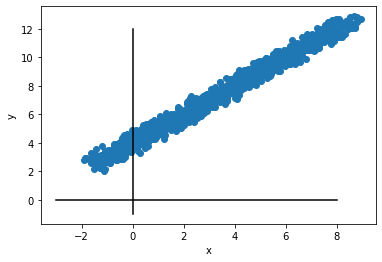

In [148]:
#create some scattered data. 
import numpy as np 
import matplotlib.pyplot as plt 

# some random data 
x = np.arange(0,10,0.01)+np.random.rand(1,1000)-2
y = 2+np.arange(0,10,0.01)+np.random.rand(1,1000)

plt.scatter(x,y)
plt.plot([-3,8],[0,0],'k')
plt.plot([0,0],[-1,12],'k')
plt.xlabel('x')
plt.ylabel('y')

So...how can we describe these data...well we can get a fit...this is called a least means squares fit...if your interested...well...I have a youtube video explaining how it works! OK so lets try and fit between -2 and 8 

In [154]:
fit = np.polyfit(np.ravel(x),np.ravel(y),1)
# OK we need to use the ravel function...but that is because python is annoying! 
print(fit)

array([0.99112287, 4.05626824])

We now have two numbers...these are the numbers which make up:

y = mx + c

So if we simulate x

In [159]:
xs = np.arange(-2,10,1)
ys = fit[0]*xs + fit[1] #our y = mx + c

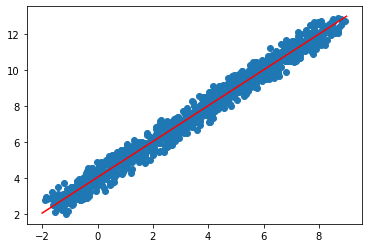

In [162]:
plt.scatter(x,y);
plt.plot(xs,ys,'r')

So whoop whoop...we can now describe all of these data with just two numbers...we can even now model...maybe we project a little further into the future...

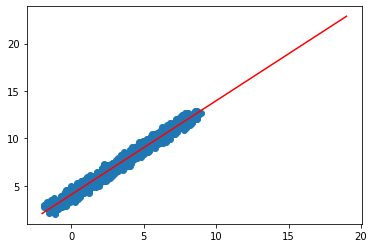

In [163]:
xs = np.arange(-2,20,1) # changing the value to 20 
ys = fit[0]*xs + fit[1] #our y = mx + c
plt.scatter(x,y);
plt.plot(xs,ys,'r')